In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
BLS_data = pd.read_csv("Historical_data_BLS_2017 .csv")
BLS_data.head()

,area,year,area_title,area_type,naics,naics_title,own_code,occ_code,occ_title,o_group,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,99,2017,U.S.,1,0,Cross-industry,1235,00-0000,All Occupations,total,...,18.12,29.38,46.23,"19,970","24,770","37,690","61,110","96,150",NaN,NaN
1,99,2017,U.S.,1,0,Cross-industry,1235,11-0000,Management Occupations,major,...,49.32,71.83,#,"48,220","69,880","102,590","149,410",#,NaN,NaN
2,99,2017,U.S.,1,0,Cross-industry,1235,11-1000,Top Executives,minor,...,49.58,78.72,#,"43,140","66,030","103,120","163,740",#,NaN,NaN
3,99,2017,U.S.,1,0,Cross-industry,1235,11-1010,Chief Executives,broad,...,88.11,#,#,"68,110","113,470","183,270",#,#,NaN,NaN
4,99,2017,U.S.,1,0,Cross-industry,1235,11-1011,Chief Executives,detailed,...,88.11,#,#,"68,110","113,470","183,270",#,#,NaN,NaN


In [3]:

US_data = BLS_data[BLS_data["area_type"] == 1]
US_data.drop(["own_code","annual", "occ_code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
US_data.dropna(axis=1, inplace=True)

State_data= BLS_data[(BLS_data["area_type"] == 2) & (BLS_data["area_title"] != "District of Columbia")]
State_data.drop(["own_code","annual", "occ_code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
State_data.dropna(axis=1, inplace=True)

US_data.head()


,year,area_title,occ_title,o_group,tot_emp,emp_prse,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
0,2017,U.S.,All Occupations,total,"142,549,250",0.1,24.34,"50,620",0.1,9.6,11.91,18.12,29.38,46.23,"19,970","24,770","37,690","61,110","96,150"
1,2017,U.S.,Management Occupations,major,"7,280,330",0.2,57.65,"119,910",0.1,23.19,33.6,49.32,71.83,#,"48,220","69,880","102,590","149,410",#
2,2017,U.S.,Top Executives,minor,"2,473,740",0.3,61.55,"128,020",0.2,20.74,31.74,49.58,78.72,#,"43,140","66,030","103,120","163,740",#
3,2017,U.S.,Chief Executives,broad,"210,160",0.7,94.25,"196,050",0.4,32.74,54.55,88.11,#,#,"68,110","113,470","183,270",#,#
4,2017,U.S.,Chief Executives,detailed,"210,160",0.7,94.25,"196,050",0.4,32.74,54.55,88.11,#,#,"68,110","113,470","183,270",#,#


In [4]:
State_data.head()

,year,area_title,occ_title,o_group,tot_emp,emp_prse,jobs_1000,loc_quotient,h_mean,a_mean,...,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
174395,2017,Alabama,All Occupations,total,"1,922,570",0.4,1000,1,20.76,"43,170",...,8.54,10.45,15.77,25.01,37.83,"17,770","21,740","32,800","52,020","78,690"
174396,2017,Alaska,All Occupations,total,"318,170",0.9,1000,1,27.77,"57,750",...,11.27,15.21,22.86,34.92,49.06,"23,450","31,630","47,560","72,630","102,040"
174397,2017,Arizona,All Occupations,total,"2,704,050",0.5,1000,1,23.15,"48,160",...,10.01,11.75,17.44,27.76,42.74,"20,820","24,430","36,270","57,740","88,900"
174398,2017,Arkansas,All Occupations,total,"1,200,130",0.7,1000,1,19.49,"40,530",...,9.02,10.28,14.82,23.08,34.55,"18,750","21,390","30,810","48,000","71,870"
174399,2017,California,All Occupations,total,"16,695,010",0.2,1000,1,27.5,"57,190",...,10.81,12.71,19.7,33.83,54.45,"22,490","26,430","40,980","70,360","113,250"


In [5]:
US_data_avg = US_data[US_data["o_group"] == "major"]
US_data_avg .drop_duplicates(["occ_title"], keep="first", inplace=True) 
US_data_avg ['a_mean'] = US_data_avg ['a_mean'].str.replace(',', '')  #remove comma in numbers
US_data_avg ['a_mean'] = US_data_avg ['a_mean'].str.replace('*', '0')
US_data_avg ['a_mean'] = US_data_avg ['a_mean'].astype(int)           #convert string to integers
US_data_avg .sort_values("a_mean", ascending = False, inplace=True)
US_data_avg [["occ_title", "a_mean"]].head(5)


,occ_title,a_mean
1,Management Occupations,119910
315,Legal Occupations,107370
126,Computer and Mathematical Occupations,89810
158,Architecture and Engineering Occupations,86190
489,Healthcare Practitioners and Technical Occupat...,80760


In [6]:
#total State Employment Rate for all different occupations by State for 2017
State_employment_rate = State_data[State_data["o_group"] == "total"]
State_employment_rate["tot_emp"] = State_employment_rate['tot_emp'].str.replace(',', '')  #remove comma in numbers
State_employment_rate["tot_emp"] = State_employment_rate["tot_emp"].astype(int)  
State_employment_rate.sort_values("tot_emp", ascending=False, inplace=True) #sorting the data for better visualization purposes
State_employment_rate[["area_title", "tot_emp"]].head()

,area_title,tot_emp
174399,California,16695010
174438,Texas,11890880
174427,New York,9207870
174404,Florida,8419030
174408,Illinois,5927860


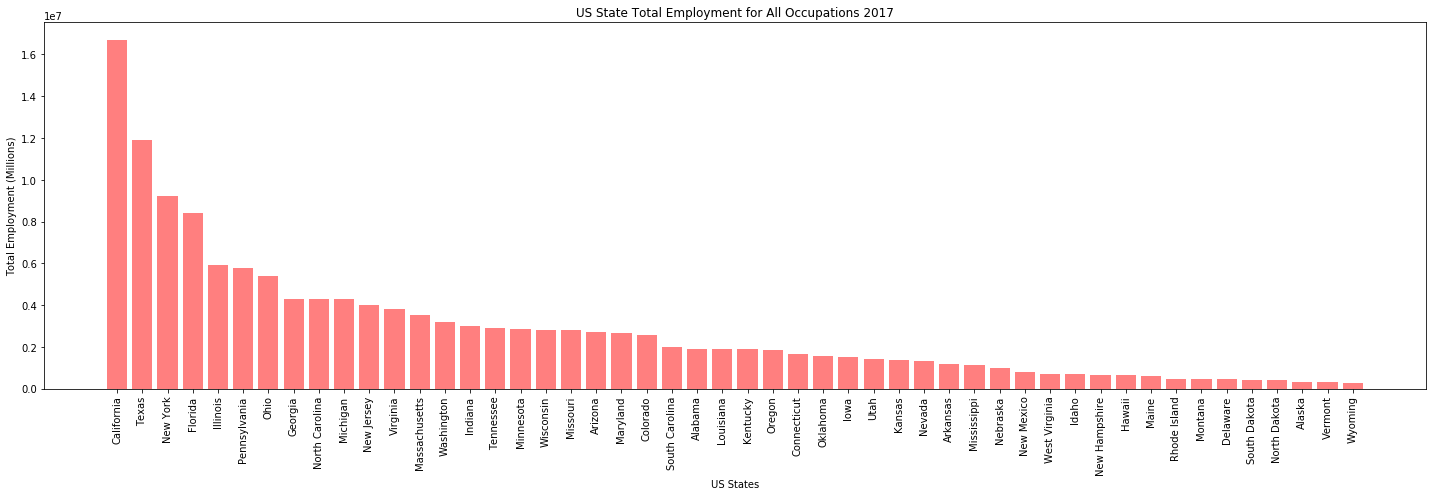

In [7]:
x = np.arange(50)
plt.figure(figsize=(20, 7))
plt.bar(x, State_employment_rate ["tot_emp"], color ="red", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Total Employment (Millions)")
plt.title("US State Total Employment for All Occupations 2017")
plt.xticks(x, State_employment_rate ["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/emp_rate_bystate2017.png")
plt.show()

In [8]:
#State Average Annual Income 2017
State_avg_income= State_data[State_data["o_group"] == "total"]
State_avg_income["a_mean"] = State_avg_income['a_mean'].str.replace(',', '')  #remove comma in numbers
State_avg_income["a_mean"] = State_avg_income["a_mean"].astype(int)     
State_avg_income.sort_values("a_mean", ascending=False, inplace=True)
State_avg_income[["area_title", "a_mean"]].head(10)

,area_title,a_mean
174416,Massachusetts,62110
174427,New York,60100
174401,Connecticut,59410
174396,Alaska,57750
174442,Washington,57480
174415,Maryland,57270
174399,California,57190
174425,New Jersey,56970
174400,Colorado,54050
174441,Virginia,53980


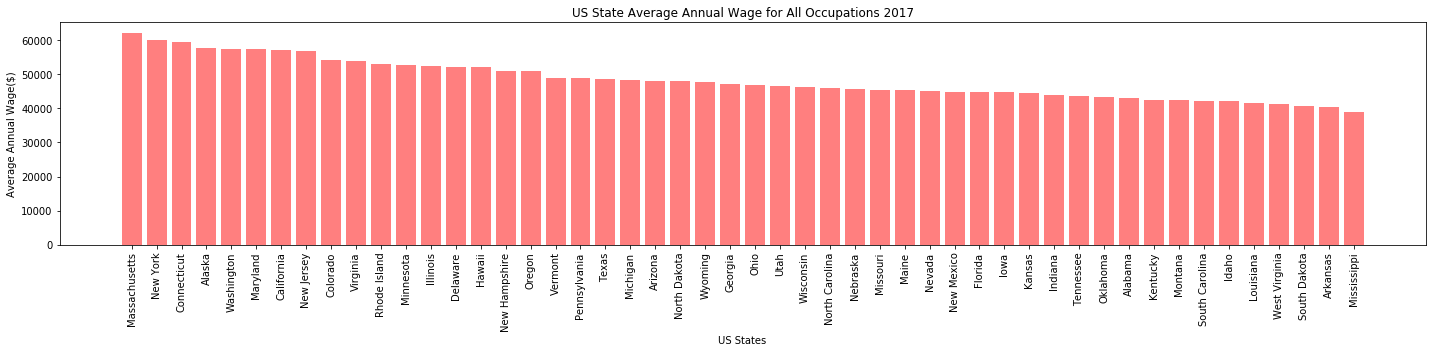

In [9]:
x = np.arange(50)
plt.figure(figsize=(20, 5))
plt.bar(x, State_avg_income["a_mean"], color = "red", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Average Annual Wage($)")
plt.title("US State Average Annual Wage for All Occupations 2017")
plt.xticks(x, State_avg_income["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/US_Avg_annualwage2017.png")
plt.show()

In [10]:
#State Average Annual Income 2017
State_avg_income_hourly= State_data[State_data["o_group"] == "total"]
State_avg_income_hourly["h_mean"] = State_avg_income['h_mean'].str.replace(',', '')  #remove comma in numbers
State_avg_income_hourly["h_mean"] = State_avg_income["h_mean"].astype(str)     
State_avg_income_hourly.sort_values("h_mean", ascending=False, inplace=True)
State_avg_income_hourly[["area_title", "h_mean"]].head(10)

,area_title,h_mean
174416,Massachusetts,29.86
174427,New York,28.9
174401,Connecticut,28.56
174396,Alaska,27.77
174442,Washington,27.63
174415,Maryland,27.53
174399,California,27.5
174425,New Jersey,27.39
174400,Colorado,25.99
174441,Virginia,25.95


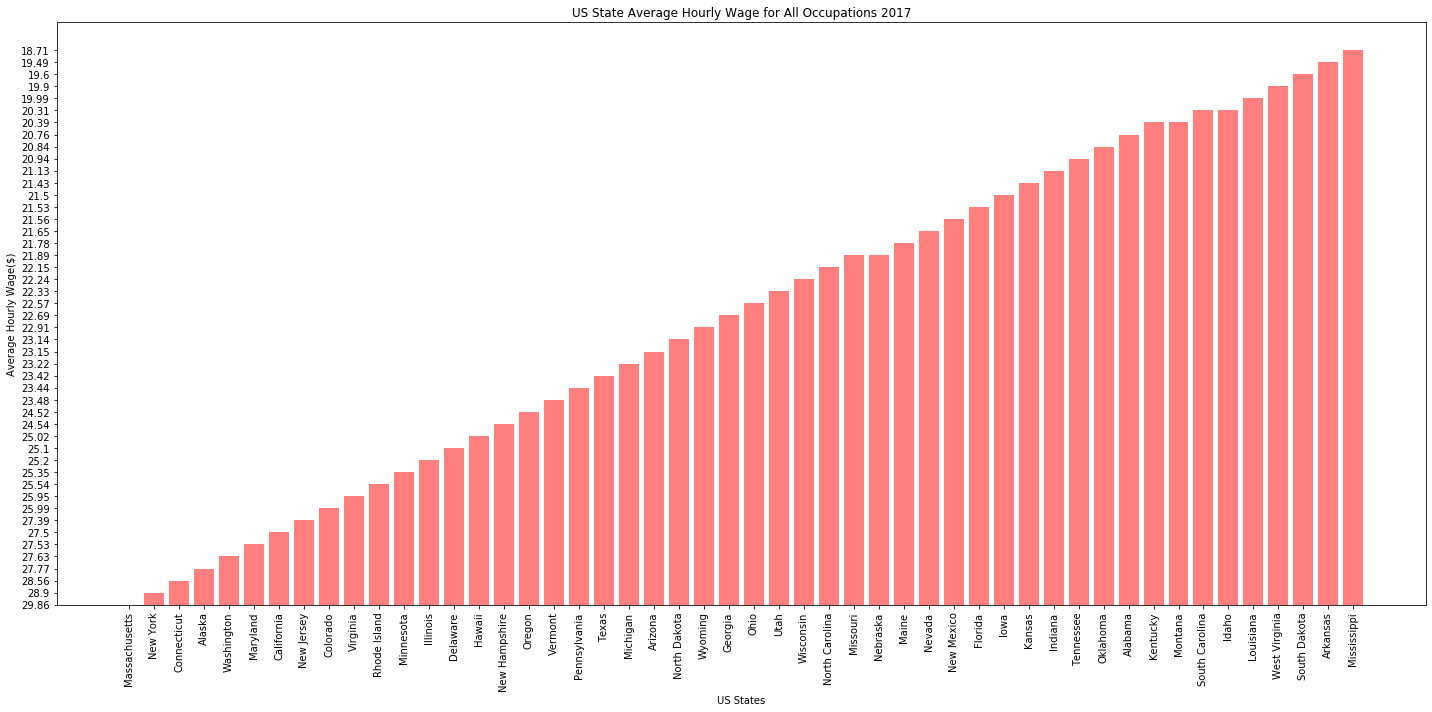

In [11]:
x = np.arange(50)
plt.figure(figsize=(20, 10))
plt.bar(x, State_avg_income_hourly["h_mean"], color = "red", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Average Hourly Wage($)")
plt.title("US State Average Hourly Wage for All Occupations 2017")
plt.xticks(x, State_avg_income_hourly["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/US_Avg_hourlywage2017.png")
plt.show()

In [12]:
#State Average Annual Income 2017
State_avg_income_hourly= State_data[State_data["o_group"] == "total"]
State_avg_income_hourly["h_mean"] = State_avg_income['h_mean'].str.replace(',', '')  #remove comma in numbers
State_avg_income_hourly["h_mean"] = State_avg_income["h_mean"].astype(str)     
State_avg_income_hourly.sort_values("h_mean", ascending=False, inplace=True)
State_avg_income_hourly[["area_title", "h_mean"]].head(10)

,area_title,h_mean
174416,Massachusetts,29.86
174427,New York,28.9
174401,Connecticut,28.56
174396,Alaska,27.77
174442,Washington,27.63
174415,Maryland,27.53
174399,California,27.5
174425,New Jersey,27.39
174400,Colorado,25.99
174441,Virginia,25.95


In [13]:
#Median Annual Income by State for 2017
State_median_income= State_data[State_data["o_group"] == "total"]
State_median_income["a_median"] = State_avg_income['a_median'].str.replace(',', '')  #remove comma in numbers
State_median_income["a_median"] = State_avg_income["a_median"].astype(str)     
State_median_income.sort_values("a_median", ascending=True, inplace=True)
State_median_income[["area_title", "a_median"]].head(10)

,area_title,a_median
174419,Mississippi,"30,070"
174398,Arkansas,"30,810"
174443,West Virginia,"31,540"
174436,South Dakota,"32,340"
174413,Louisiana,"32,490"
174435,South Carolina,"32,780"
174395,Alabama,"32,800"
174407,Idaho,"33,250"
174404,Florida,"33,420"
174426,New Mexico,"33,450"


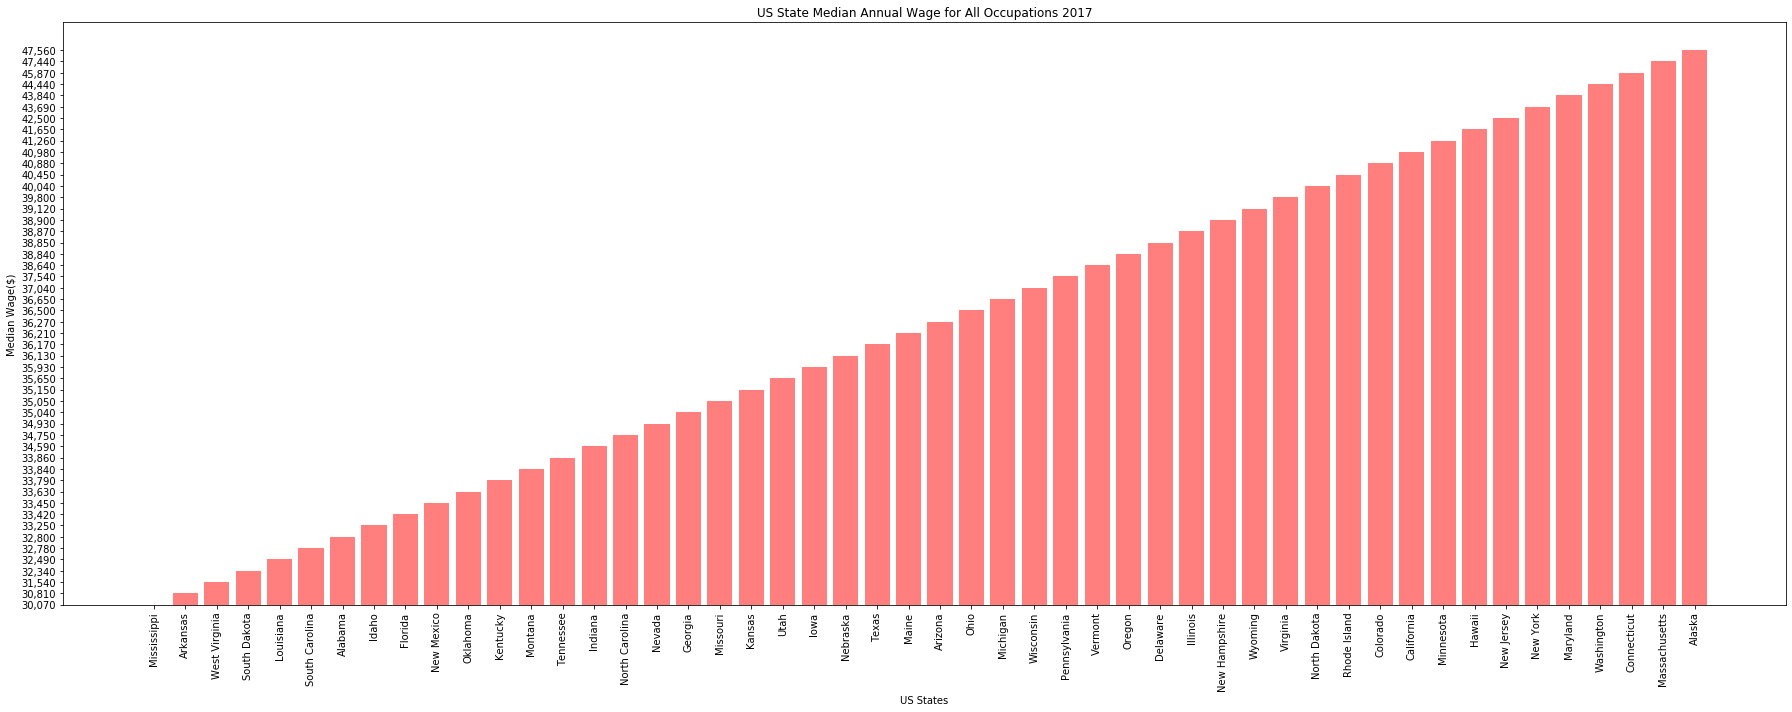

In [14]:
x = np.arange(50)
plt.figure(figsize=(25, 10))
plt.bar(x, State_median_income["a_median"], color = "red", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Median Wage($)")
plt.title("US State Median Annual Wage for All Occupations 2017")
plt.xticks(x, State_median_income["area_title"], rotation = 90)
plt.tight_layout()
plt.savefig("Figures/US_Median_Annualwage2017.png")
plt.show()

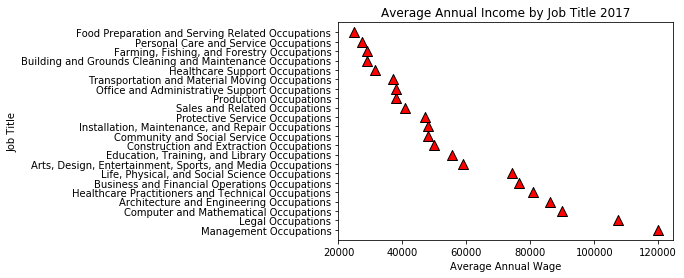

In [15]:
plt.scatter(US_data_avg["a_mean"],US_data_avg["occ_title"],edgecolors="black",facecolors="red",s=100,marker="^")
plt.title("Average Annual Income by Job Title 2017")
plt.xlabel("Average Annual Wage")
plt.ylabel("Job Title")

#plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/Average Annual Income by Job Title2017.png")

plt.show()